<a href="https://colab.research.google.com/github/obarakaz/stats/blob/main/multiple_testing_Simulation1_EN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The problems of multiple testing

There is a student named John who only knows about the $t$-test for testing differences in means.
He is unfamiliar with analysis of variance (*ANOVA*).

Let's consider a scenario where John wants to test the null hypothesis $H_0$.  

$$ \text{H}_0:\mu_{A} =\mu_{B} =\mu_{C} $$


At this point, he assumes that the samples $a$, $b$, and $c$ are randomly selected from populations $A$, $B$, and $C$.

In a $t$-test, it is not possible to simultaneously test the differences in means for all three groups. So John has no choice but to perform three separate $t$-tests:

$$ \text{H} _1:\mu_{A} =\mu_{B} $$
$$ \text{H} _2:\mu_{B} =\mu_{C} $$
$$ \text{H} _3:\mu_{C} =\mu_{A} $$

However, this approach is known to **increase the risk of "Type I errors" (α errors)** due to the problem of multiple testing.

> Suppl.: The purpose of the statistical testing is not to mathematically prove a definite constant but to reject it. Therefore, it is not possible to say that "if null hypotheses 1 and 2 are rejected, 3 will automatically be rejected as well". So it is necessary to test each of the three hypotheses as described above.


In this situation, if $p = 0.05$ is used as the significance level as is the usual practice, a "statistically significant difference" will be claimed based on a much looser standard than 5% in practice.

In the following, we will conduct a specific simulation.

## Simulation Assumptions

First, we hypothetically create three populations $A$, $B$, and $C$ where the "population means are equal."

In other words, the true scenario here is that:

$$ \mu_{A} =\mu_{B} =\mu_{C} $$


Then, we sample from these populations $A$, $B$, and $C$, with each sample size being $n = 20$.

The obtained samples are denoted as $a$, $b$, and $c$, respectively. Based on these sample means, we perform three $t$-tests (using the combinations $ab$, $bc$, and $ca$).

As mentioned earlier, the null hypothesis we want to test here is that "the population means for all three groups are equal," which can be stated as:

$$ \text{Null Hypothesis}:\mu_{A} =\mu_{B} =\mu_{C} $$

In this simulation, we already know that this null hypothesis is true.

Therefore, when conducting $t$-tests using the randomly sampled data from $A$, $B$, and $C$, we must conclude that "the null hypothesis cannot be rejected (=this is not statistically significant)" for all pairs: $a$-$b$, $b$-$c$, and $c$-$a$.

Any other conclusions are Type I errors (i.e., incorrectly claiming differences in population means).

The table below illustrates the situations:


| A vs B | B vs C | C vs A | Type I Error for All 3 Groups |
| :--: | :--: | :--: | :--------------------: |
| n.s. | n.s. | n.s. | Not committed(=OK)  |
| sig.  | n.s. | n.s. | committed    |
| n.s. | sig. | n.s.  | committed    |
| n.s. | n.s. | sig.  | committed    |
| sig. | sig. | n.s.  | committed    |
| sig. | n.s. | sig.  | committed    |
| n.s. | sig. | sig.  | committed    |
| sig. | sig. | sig.  | committed    |

> sig.: statistically significant

> n.s.: statistically "not" significant

## How to simulate


Here is the outline of the steps for conducting the simulation:

1. Generate random samples $a$, $b$, and $c$ from three hypothetical populations with equal population means (i.e., sampling).
2. Perform $t$-tests for the three combinations $a$-$b$, $b$-$c$, and $c$-$a$, using a significance level of 0.05.
3. Determine if any Type I errors were committed (i.e., if any of the tests were statistically significant).
4. Repeat steps 1-3 a large number of times (=$m$ times).
5. Calculate the proportion of times Type I errors were committed out of the $m$ repetitions.

If the proportion calculated in the above process exceeds 0.05, it implies that we are "claiming statistical significance using a significance level of 0.05 but actually using a more lenient criterion."

Now, let's proceed with the simulation.

## Sim1: When all populations follow a standard normal distribution

Let's start with the simplest simulation scenario, where populations $A$, $B$, and $C$ all follow a standard normal distribution (with a mean of 0 and a variance of 1).

In this case, it is evident that:

$$ \mu_{A} =\mu_{B} =\mu_{C} (=0) $$


So we know that the null hypothesis is true.

### Step 1: Generating random samples a, b, and c

We will extract samples $a$, $b$, and $c$ from a standard normal distribution with a sample size of $n = 20$.

In [3]:
# extract samples a, b, and c from a standard normal distribution
a = rnorm(n=20)
b = rnorm(n=20)
c = rnorm(n=20)

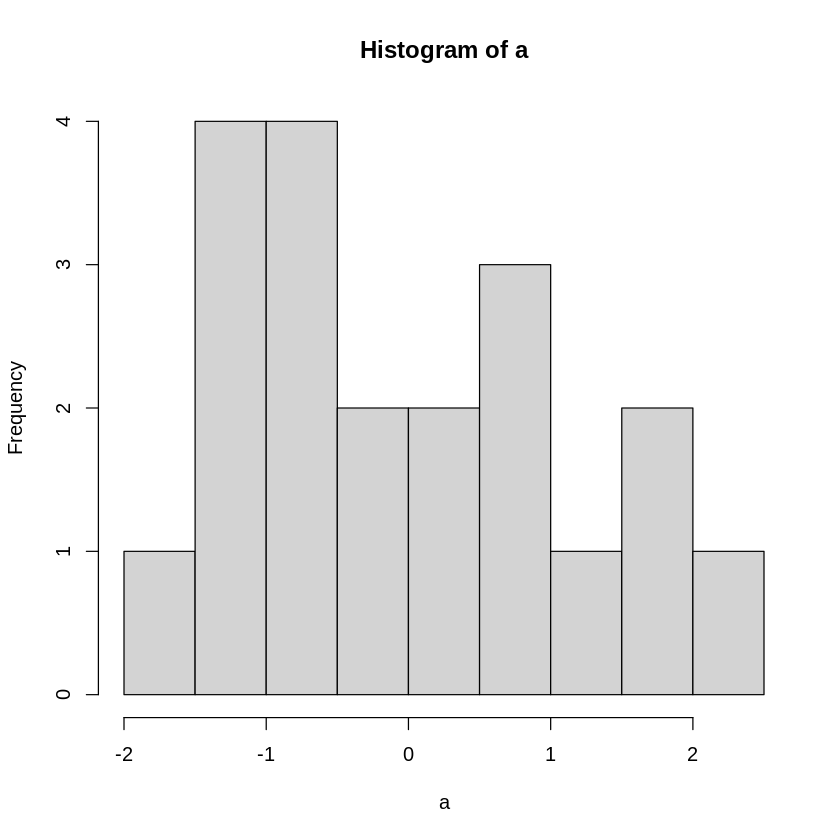

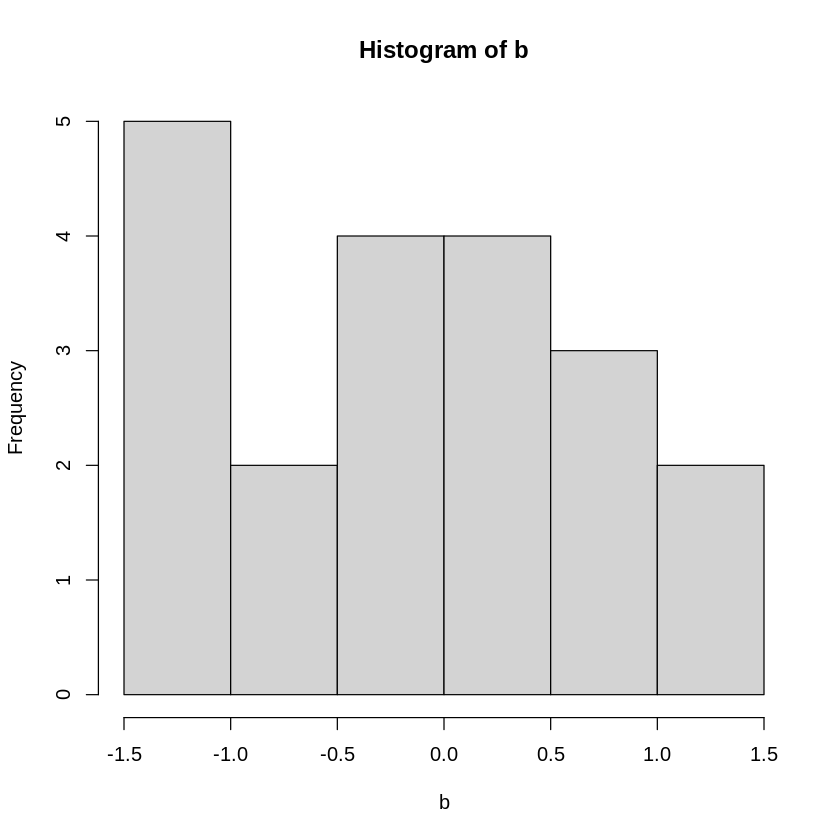

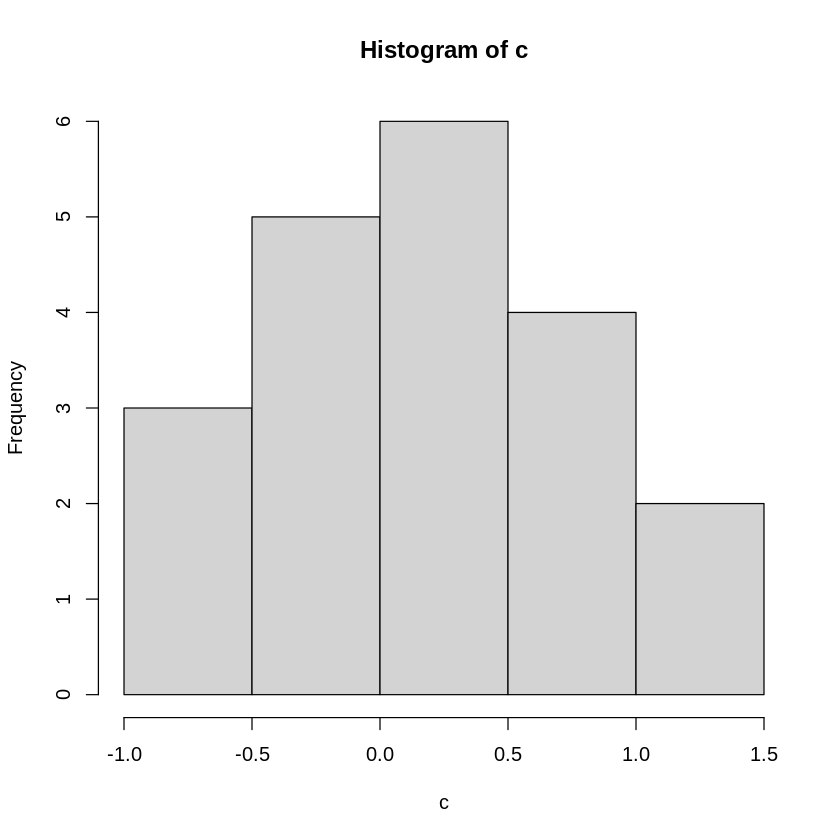

In [4]:
#appendix: let's see the histograms
hist(a)
hist(b)
hist(c)

### Step 2: Performing t-tests

Next, we will conduct $t$-tests for the combinations $a$-$b$, $b$-$c$, and $c$-$a$.

Since all groups have equal population variances of 1, we will specify "var.equal=TRUE"

In [5]:
abtest = t.test(a,b,var.equal=TRUE) # Assign the result of the t-test for the combination of a-b in "abtest"
bctest = t.test(b,c,var.equal=TRUE) # Assign the result of the t-test for the combination of b-c in "bctest"
catest = t.test(c,a,var.equal=TRUE) # aAssign the result of the t-test for the combination of c-a in "catest"

In [6]:
# Appendix
# show the number of elements (= number of data types) in the variable "abtest"
length(abtest)

[1] 10

In [7]:
# Appendix
# display all the elements of "abtest"
abtest[1] #t statistic
abtest[2] #df = degree of freedom
abtest[3] #p.value
abtest[4] #confidence interval (compatibility interval)
abtest[5] #estimate
abtest[6] #null.value
abtest[7] #stderr = SE; standard error
abtest[8] #alternative = two-sided
abtest[9] #method = Two-sample t-test
abtest[10] #data name

$statistic
       t 
0.403357

$parameter
df 
38

$p.value
[1] 0.6889463

$conf.int
[1] -0.5261462  0.7879844
attr(,"conf.level")
[1] 0.95

$estimate
  mean of x   mean of y 
 0.01011468 -0.12080444

$null.value
difference in means 
                  0

$stderr
[1] 0.3245738

$alternative
[1] "two.sided"

$method
[1] " Two Sample t-test"

$data.name
[1] "a and b"

### Step 3: Determination of alpha error

As mentioned above, when conducting a $t$-test here, we must determine that "the null hypothesis cannot be rejected (=this is not statistically significant)" for all pairs of $a$-$b$, $b$-$c$, and $c$-$a$.

If the result of any one test is $p<0.05$, it is the Type-I error in a three-group comparison (i.e., saying there is a difference when there is really no difference in the population means).

In [8]:
# Let's check the p-value of the t-test for each of ab, bc, ca
abtest$p.value
bctest$p.value
catest$p.value

# Create a function "if any one of ab, bc, ca returns p<0.05, it returns alpha error, otherwise it returns OK"
ifelse(abtest$p.value<0.05|bctest$p.value<0.05|catest$p.value<0.05, "alpha error", "OK")

[1] 0.6889463

[1] 0.1787912

[1] 0.5189168

[1] "OK"

### Step 4: Repeat several times

Repeat the above process 10 times.


In "R" language, this can be done with the command "for".

- Just in case, we recommend you start with a small number.


In [11]:
Number_of_alpha_errors = 0 #0 at the beginning, the following repetitions increase the number of errors
for(i in 1:10){
a = rnorm(n=20)
b = rnorm(n=20)
c = rnorm(n=20)
abtest = t.test(a,b,var.equal=TRUE)
bctest = t.test(b,c,var.equal=TRUE)
catest = t.test(c,a,var.equal=TRUE)
Number_of_alpha_errors = Number_of_alpha_errors + ifelse(abtest$p.value<0.05|bctest$p.value<0.05|catest$p.value<0.05, 1, 0) # if p<0.05 for any one of ab, bc, ca then return 1, otherwise return 0."
}
Number_of_alpha_errors

[1] 1

### Step 5: Find the proportion of alpha errors committed out of "m" times

After confirming that the program seems to be OK, we run the simulation a large number of times ($m$).

- If the proportion of the number of times that an α error is committed out of $m$ simulations exceeds 0.05, it means that "the significance level is set at 0.05, but in fact the significance is claimed by a more lenient criterion.

In [13]:
m = 1000 #Specify the number of repetitions m as 1000
Number_of_alpha_errors = 0  #0 at the beginning, the following repetitions increase the number of errors
for(i in 1:m){
a = rnorm(n=20)
b = rnorm(n=20)
c = rnorm(n=20)
abtest = t.test(a,b,var.equal=TRUE)
bctest = t.test(b,c,var.equal=TRUE)
catest = t.test(c,a,var.equal=TRUE)
Number_of_alpha_errors = Number_of_alpha_errors + ifelse(abtest$p.value<0.05|bctest$p.value<0.05|catest$p.value<0.05, 1, 0)
}

Number_of_alpha_errors/m  #Proportion of α errors committed out of m times

[1] 0.112

The number obtained here settles at about 10-13%, as you can see by running the above program several times.

Compared to the originally intended significance level of $p=0.05$, we can see that we end up claiming "statistically significant" with a standard that is more than twice as lenient.

The obtained "committed α-error" proportion can be calculated 100 times to make a histogram.

- In the following, $m=100$ is used because it can be too heavy.
- The "committed α-error" obtained after 100 calculations is calculated 100 times, so this is still 10,000 calculations.

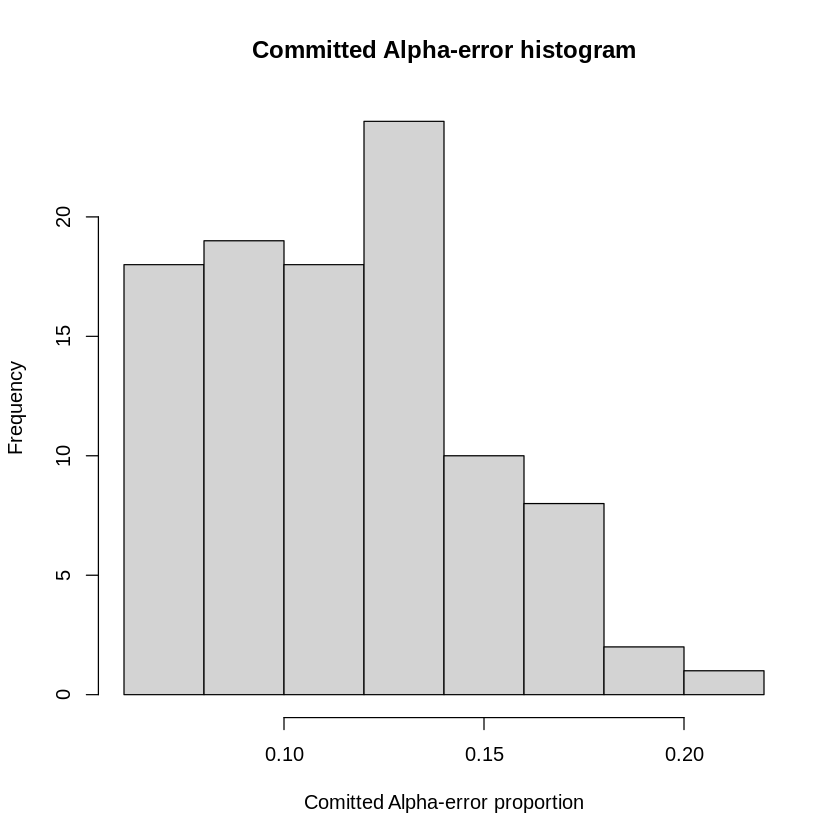

In [16]:
m = 100 #Specify the number of repetitions m as 1000
committed_alpha_values = numeric(100) # committed_alphaの値を格納するためのベクトルを作成

for(i in 1:100){
Number_of_alpha_errors = 0  #0 at the beginning, the following repetitions increase the number of errors
  for(j in 1:m){
  a = rnorm(n=20)
  b = rnorm(n=20)
  c = rnorm(n=20)
  abtest = t.test(a,b,var.equal=TRUE)
  bctest = t.test(b,c,var.equal=TRUE)
  catest = t.test(c,a,var.equal=TRUE)
  Number_of_alpha_errors = Number_of_alpha_errors + ifelse(abtest$p.value<0.05|bctest$p.value<0.05|catest$p.value<0.05, 1, 0)
}
committed_alpha_values[i] = Number_of_alpha_errors/m  # 実際にαエラーを犯した割合を格納
}

hist(committed_alpha_values, main="Committed Alpha-error histogram", xlab="Comitted Alpha-error proportion")